<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Batch%20Normalization%20%26%20Regularization/NormalizationAndRegularizationOnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization and Regularization on MNIST 

#### On MNIST digits classification, let us analyze the impact of performing 

*   Image normalization
*   L2 regularization (With Custom loss function)
*   Activation (ReLU) after performing Batch Normalization







### Importing Libraries

In [0]:
import os
import numpy as np

import keras.backend as K
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

from keras.datasets import mnist

### Preparing Dataset 

In [159]:
#Loading data from Keras datasets
(trainX, trainY), (testX, testY) = mnist.load_data()
print (trainX.shape)


(60000, 28, 28)


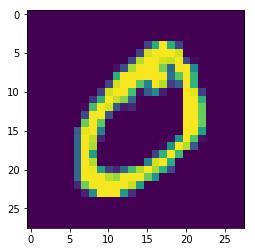

In [160]:
#Ploting a single image from dataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(trainX[1])

In [0]:
#Reshaping to store the Channel information. Since its a grayscale image, 1 is mentioned in the end, if its a RGB image, 3 would have been mentioned
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
testX = testX.reshape(testX.shape[0], 28, 28,1)

In [0]:
#Equalization of data, (0-1) converges faster than (0-255)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

In [0]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(trainY[:10])

# Label Encoding: Converting to one hot encoding  (ex : 5 -> [0,0,0,0,0,1,0,0,0,0]).
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10
                                
# print first ten (one-hot) training labels
print('One-hot labels:')
print(trainY[:10])

In [0]:
# applying transformation to image
train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit the data augmentation
train_gen.fit(trainX)
test_gen.fit(testX)


In [0]:
training_generator= train_gen.flow(trainX, trainY, batch_size=128)
testing_generator= test_gen.flow(testX, testY, batch_size=128, shuffle=False)

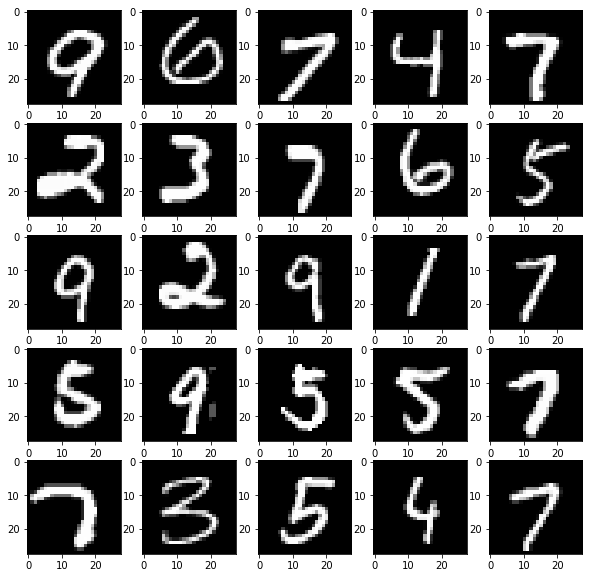

In [166]:
# Quick look at the some augmented images
plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in training_set:
    for i in range(0, 25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    break

### Creating Model

In [167]:
from keras.layers import Activation

def createModel:
model = Sequential()
 
model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3), use_bias=False)) #24
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False)) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, (3, 3), use_bias=False))#10
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#8
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#6
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(16, (3, 3), use_bias=False))#4
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(Activation('relu'))


model.add(Convolution2D(10, 4, 4, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_41 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_42 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 10)        160       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), use_bias=False)`


### Defining Learning Rate, Checkpoint, Early stopping

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)               
                         

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# checkpoint
filepath="/content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

### Defining Custom Loss function

In [0]:
def loss_with_reg(model, batch_size, _lambda = 0.001):
  reg_loss_sqr = 0
  for layer in model.layers:
    if(len(layer.get_weights())>0):
      reg_loss_sqr += np.sum(layer.get_weights()[0]**2)
    reg_loss_sqr = reg_loss_sqr * (_lambda/2*batch_size)
    
  def loss(y_true, y_pred):
    return K.categorical_crossentropy(y_true, y_pred) + reg_loss_sqr
  return loss

In [174]:
model.compile(loss=loss_with_reg(model=model, batch_size=128), optimizer='Adam', metrics=['accuracy'])
callbacks_list = [earlystop, checkpoint, LearningRateScheduler(scheduler, verbose=1)]

model.fit(trainX, trainY, batch_size = 128, epochs = 5, validation_data = (testX, testY), verbose = 2, callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 - 10s - loss: 0.1700 - acc: 0.9506 - val_loss: 0.0776 - val_acc: 0.9771

Epoch 00001: val_acc improved from -inf to 0.97710, saving model to /content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-01-0.98.hdf5
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
 - 5s - loss: 0.0471 - acc: 0.9862 - val_loss: 0.0601 - val_acc: 0.9816

Epoch 00002: val_acc improved from 0.97710 to 0.98160, saving model to /content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-02-0.98.hdf5
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
 - 5s - loss: 0.0362 - acc: 0.9898 - val_loss: 0.0358 - val_acc: 0.9890

Epoch 00003: val_acc improved from 0.98160 to 0.98900, saving model to /content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-03-0.99.hdf5
Epoch 4/5

Epoch 00004:

In [188]:
print(len(training_generator))
print(len(testing_generator))

469
79


In [185]:
model.compile(loss=loss_with_reg(model=model, batch_size=128), optimizer='Adam', metrics=['accuracy'])
callbacks_list = [earlystop, checkpoint, LearningRateScheduler(scheduler, verbose=1)]


model.fit_generator(training_generator, 
                    steps_per_epoch = len(training_generator),
                    epochs=30,
                    validation_data = testing_generator,
                    validation_steps = len(testing_generator),
                    callbacks = callbacks_list)

Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 13s 28ms/step - loss: 0.9501 - acc: 0.9997 - val_loss: 1.0070 - val_acc: 0.9919

Epoch 00001: val_acc did not improve from 0.99383
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 7s 14ms/step - loss: 0.9506 - acc: 0.9997 - val_loss: 1.0067 - val_acc: 0.9930

Epoch 00002: val_acc did not improve from 0.99383
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 6s 14ms/step - loss: 0.9498 - acc: 0.9999 - val_loss: 0.9999 - val_acc: 0.9941

Epoch 00003: val_acc improved from 0.99383 to 0.99410, saving model to /content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-03-0.99.hdf5
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/469 [==============================

### Prediction

In [192]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/NormalizationAndRegularizationOnMNIST/weights-06-0.99.hdf5', custom_objects={'loss_with_reg': loss_with_reg, 'loss':loss})

NameError: ignored

In [0]:
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY, axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#plot_confusion_matrix(confusion_mtx, classes = range(10))

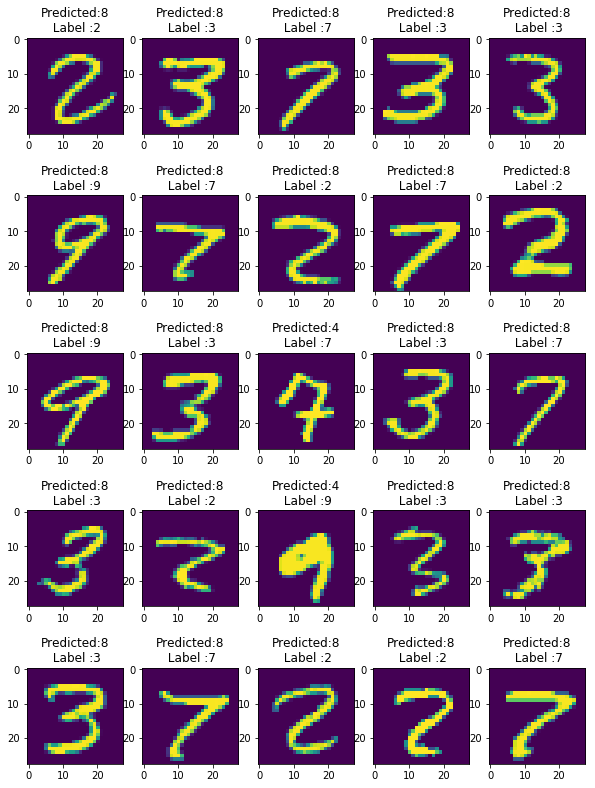

In [152]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = testX[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 25 images with their predicted and real labels"""
    n = 0
    nrows = 5
    ncols = 5
    #fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 14))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted:{}\n Label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 25 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 25 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)